In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df = pd.read_csv("diabetes_pred.csv")

In [6]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Exploratory Data Analysis (EDA)

In [7]:
df.shape

(100000, 9)

In [8]:
print("Basic Info:")
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [9]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [10]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%     

In [11]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [12]:
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
3854


In [13]:
df = df.drop_duplicates()

In [14]:
print("\nTarget Variable Distribution:")
print(df['diabetes'].value_counts())


Target Variable Distribution:
0    87664
1     8482
Name: diabetes, dtype: int64


In [15]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


# Visualizations

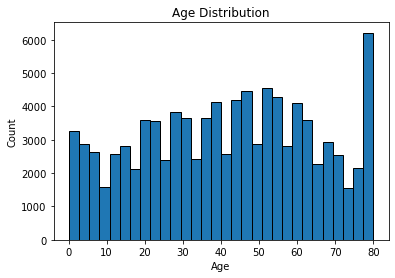

In [16]:
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [17]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

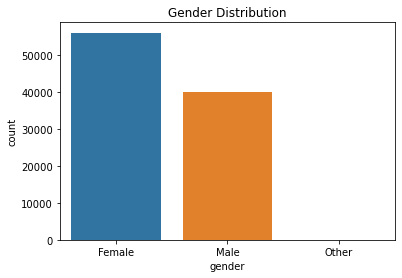

In [18]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

C:\Users\omark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


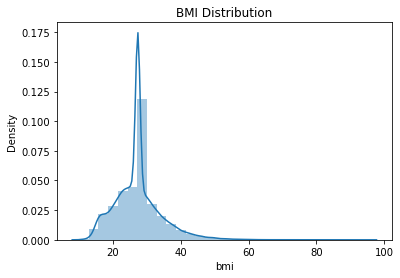

In [19]:
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

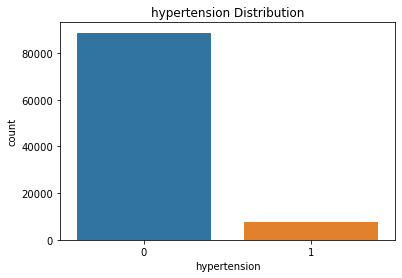

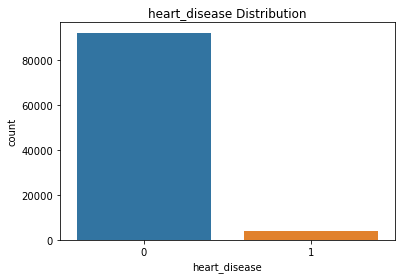

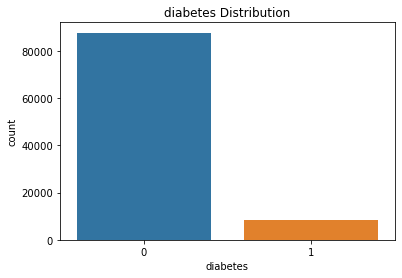

In [20]:
#Observe the distribution for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()


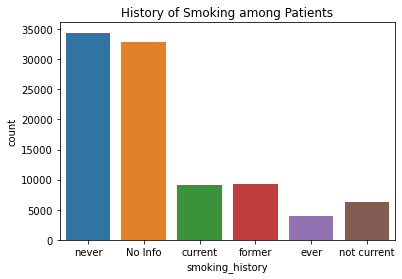

In [21]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('History of Smoking among Patients')
plt.show()

In [22]:
df['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

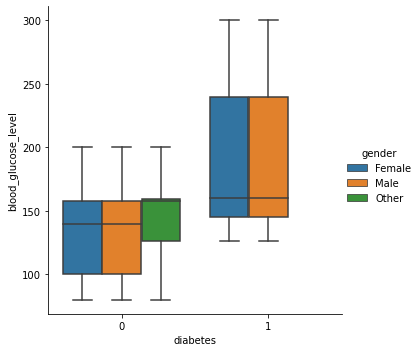

In [23]:
sns.catplot(data = df, x = 'diabetes', y = 'blood_glucose_level', kind = 'box', hue = 'gender')
plt.show()

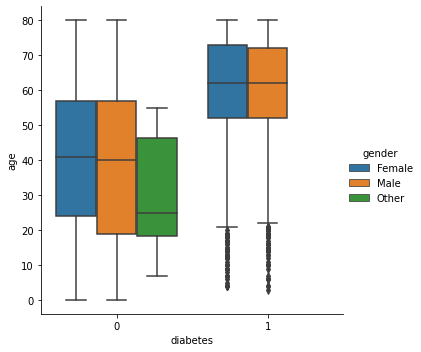

In [24]:
sns.catplot(data = df, x = 'diabetes', y = 'age', kind = 'box', hue = 'gender')
plt.show()

Observation: Individuals with diabetes have a higher median age and a general trend of increasing age among individuals with diabetes. This finding displays the relationship between higher age and the likelihood of developing diabetes. It suggests that age plays a significant role in the prevalence of diabetes, with older individuals being more susceptible to the disease.Notably, there are outlier where diabetes was seen to be detected in individuals under the age of 20

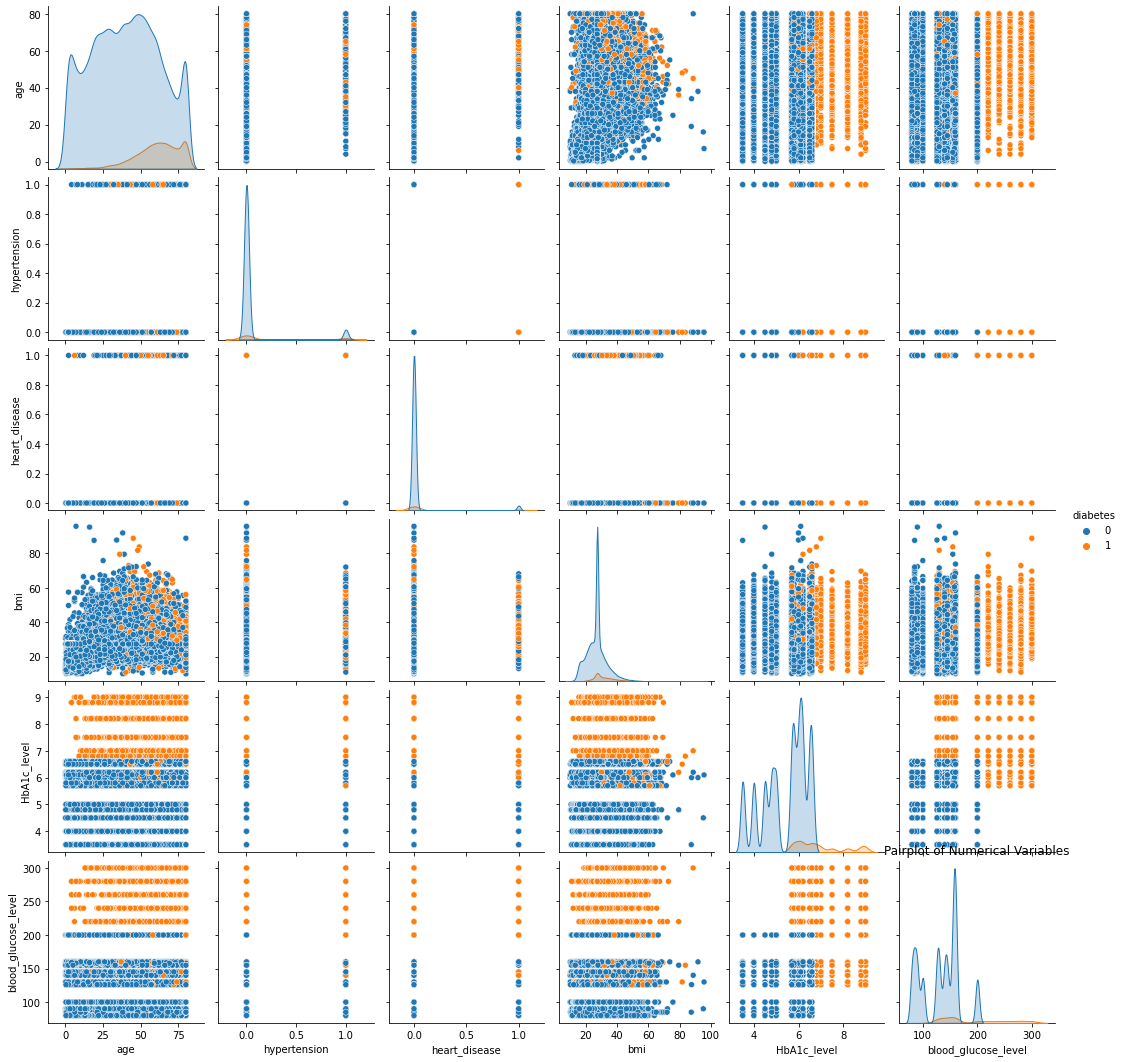

In [26]:
sns.pairplot(df, hue='diabetes')
plt.title("Pairplot of Numerical Variables")
plt.show()

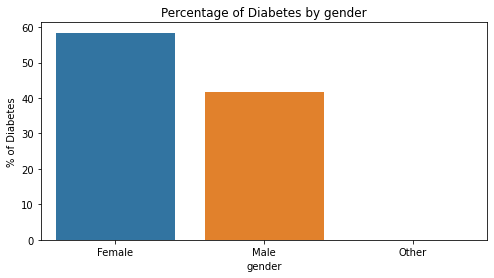

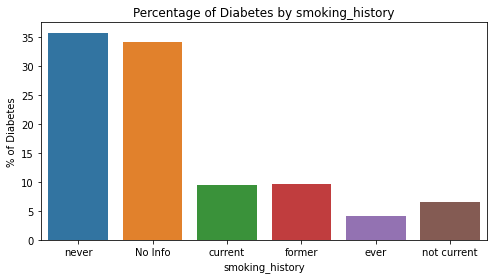

In [27]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=col, y='diabetes', data=df, estimator=lambda x: len(x) / len(df) * 100)
    plt.ylabel('% of Diabetes')
    plt.title(f'Percentage of Diabetes by {col}')
    plt.show()

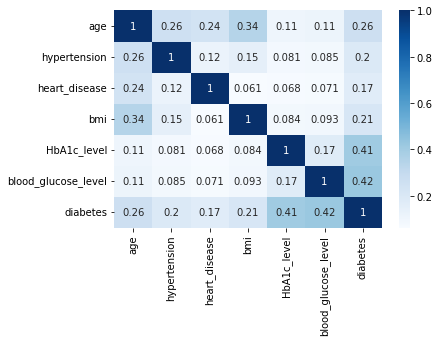

In [28]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

# Prediction/ Training and Testing the Model

Testing_df is a copy of the original dataset, except it doesnt have the target column (diabetes)

In [30]:
testing_df = df.iloc[:,:-1]

In [31]:
testing_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [32]:
testing_df = pd.get_dummies(testing_df, columns= ['gender'], drop_first=True)

In [33]:
testing_df = pd.get_dummies(testing_df, columns= ['smoking_history'], drop_first=True)

In [34]:
#X is the dataframe without the diabetes column and having encoded the categorical variables
#Y is the target variable this model will aim to predict
X = testing_df
y = df['diabetes']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(76916, 13)
(76916,)
(19230, 13)
(19230,)


In [131]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

C:\Users\omark\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
#Defining an empty dictionary to store all the results
results={}

In [133]:
print("Training Performance: ")
print(logistic.score(X_train,y_train))
print("Testing Performance: ")
print(logistic.score(X_test,y_test))

Training Performance: 
0.9587082011545062
Testing Performance: 
0.95600624024961


In [134]:
results['Logistic Regression'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted')]

Model Accuracy:  0.95600624024961
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.84      0.63      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.90      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



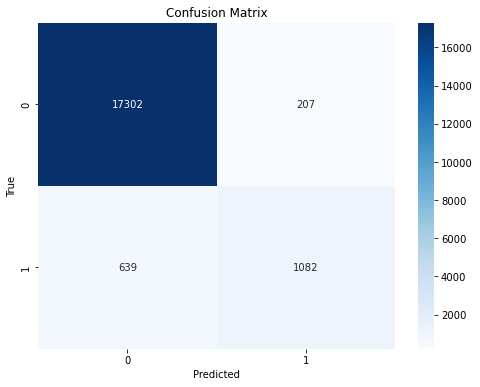

In [135]:
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [136]:
X = testing_df
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [137]:
rfc = RandomForestClassifier(max_depth=10,min_samples_split=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [138]:
print("Training Performance: ")
print(rfc.score(X_train,y_train))
print("Testing Performance: ")
print(rfc.score(X_test,y_test))

Training Performance: 
0.9705912943990848
Testing Performance: 
0.9720228809152366


In [139]:
results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted')]

Model Accuracy:  0.9720228809152366
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17576
           1       1.00      0.67      0.81      1654

    accuracy                           0.97     19230
   macro avg       0.99      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230



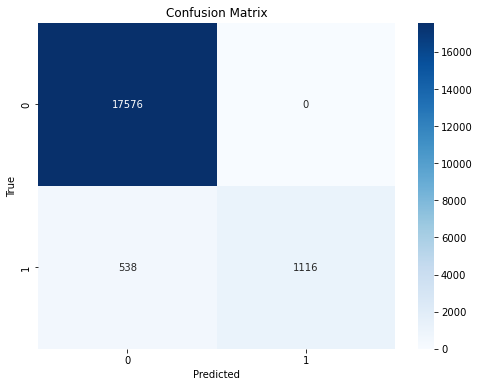

In [140]:
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [141]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [142]:
print("Training Performance: ")
print(knn.score(X_train,y_train))
print("Testing Performance: ")
print(knn.score(X_test,y_test))

Training Performance: 
0.9622575276925477
Testing Performance: 
0.9544461778471138


In [143]:
results['K-Nearest Neighbors (KNN)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted')]

Model Accuracy:  0.9544461778471138
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17576
           1       0.88      0.55      0.67      1654

    accuracy                           0.95     19230
   macro avg       0.92      0.77      0.82     19230
weighted avg       0.95      0.95      0.95     19230



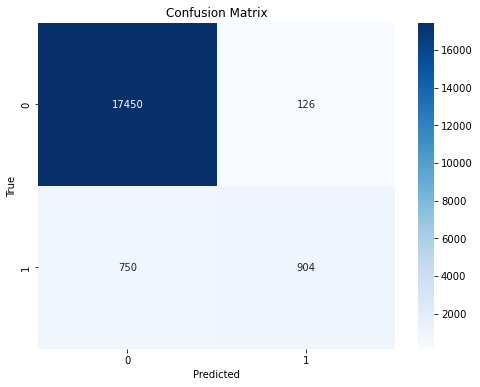

In [144]:
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [145]:
X = testing_df
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [146]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [147]:
print("Training Performance: ")
print(gnb.score(X_train,y_train))
print("Testing Performance: ")
print(gnb.score(X_test,y_test))

Training Performance: 
0.8652686047116335
Testing Performance: 
0.8604784191367655


In [148]:
results['GaussianNB'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted')]

Model Accuracy:  0.8604784191367655
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     17553
           1       0.36      0.78      0.49      1677

    accuracy                           0.86     19230
   macro avg       0.67      0.82      0.71     19230
weighted avg       0.92      0.86      0.88     19230



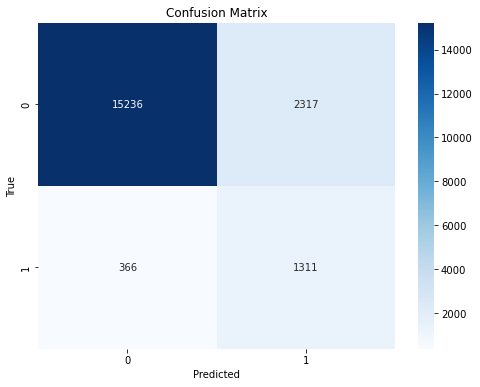

In [149]:
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [150]:
X = testing_df
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [151]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [152]:
print("Training Performance: ")
print(dt.score(X_train,y_train))
print("Testing Performance: ")
print(dt.score(X_test,y_test))

Training Performance: 
0.9992125048289798
Testing Performance: 
0.9511163500208015


In [153]:
results['Decision Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted')]

Model Accuracy:  0.9511163500208015
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26282
           1       0.72      0.74      0.73      2562

    accuracy                           0.95     28844
   macro avg       0.85      0.86      0.85     28844
weighted avg       0.95      0.95      0.95     28844



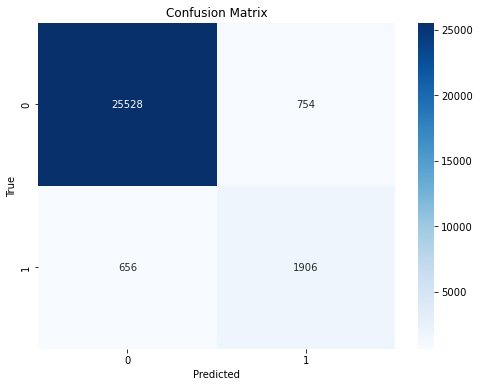

In [154]:
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [156]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

df_results

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.956006,0.953199,0.956006,0.953117
Random Forest,0.972023,0.972854,0.972023,0.969517
K-Nearest Neighbors (KNN),0.954446,0.951814,0.954446,0.949548
GaussianNB,0.860478,0.922893,0.860478,0.882029
Decision Trees,0.951116,0.951994,0.951116,0.951529


In [38]:

# K-Fold Cross-Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Logistic Regression
log_reg = LogisticRegression()
log_reg_scores = cross_val_score(log_reg, X, y, cv=kf)

# Decision Tree
decision_tree = DecisionTreeClassifier()
dt_scores = cross_val_score(decision_tree, X, y, cv=kf)

# Random Forest
random_forest = RandomForestClassifier()
rf_scores = cross_val_score(random_forest, X, y, cv=kf)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X, y, cv=kf)

# Gradient Boosting
gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, X, y, cv=kf)

# Print average accuracy for each algorithm
print("Logistic Regression:", np.mean(log_reg_scores))
print("Decision Tree:", np.mean(dt_scores))
print("Random Forest:", np.mean(rf_scores))
#print("SVM:", np.mean(svm_scores))
print("KNN:", np.mean(knn_scores))
print("Gradient Boosting:", np.mean(gb_scores))


C:\Users\omark\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\omark\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression: 0.9576685630429014
Decision Tree: 0.9493166790377476
Random Forest: 0.9686310417937545
KNN: 0.9531649871122516
Gradient Boosting: 0.970846421271693
